# Data Pre-Processing
<ul> Steps involved
<li> Importing all the required libraries
<li> Read Dataset
<li> Duplicates and Garbage Value Treatment
<li> Missing Value treatment
<li> Normalisation
<li> Outlier Treatment
<li> Encoding
</ul>

<h3> Importing the required Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h3> Reading the Dataset

In [ ]:
data = pd.read_csv("salary.csv")

<h4> Removing irrelevant features and sorting the data

In [ ]:
data.drop(labels=["fnlwgt", "education", "marital-status", "race", "capital-gain", "capital-loss", "relationship", "native-country"], axis=1, inplace=True)
data = data[["age", "education-num", "hours-per-week", "workclass", "occupation", "sex", "salary"]]

<h4> The removal of 'native-country' was done as more than 75% of values were United-States and there was very less variability in that feature

<h4> Removing all the duplicate values if present

In [ ]:
data.duplicated()
data.drop_duplicates(inplace=True)

<h4> The data does not show any null values as all the null values have been replaced with '?'

In [ ]:
data.describe(include='all')

<h3> Looking for Null and Garbage Values

In [ ]:
for i in data.select_dtypes(include="object").columns:
    print(data[i].value_counts())
    print("***"* 10)

<h4> As we can see we have garbage values in the <b> 'workclass' </b>, <b>'occupation'</b> and <b>'native-country'</b> column

<h4> Replacing the '?' values with NaN

In [ ]:
data.replace(" ?" , np.nan, inplace=True)
data.info()

In [ ]:
data.isnull().sum()

<h2> Removing Null values

<h4> Dropping null values from occupation and filling null values with mode in workclass


<h4> If we drop the null values from occupation there are no more null values left in the dataset

In [ ]:
for i in["occupation"]:
    data.dropna(inplace=True, subset=[i])

In [ ]:
for i in ["workclass"]:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [ ]:
data.isnull().sum()

In [ ]:
data.info()

# Data Analysis

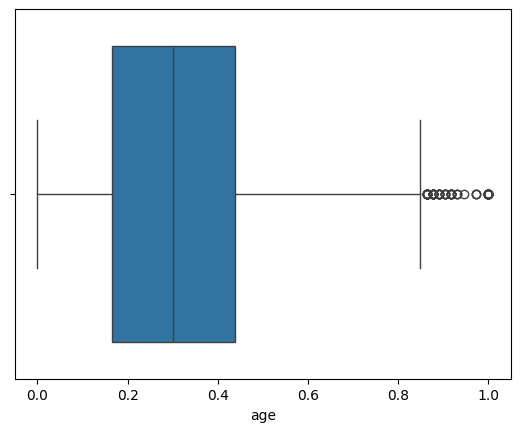

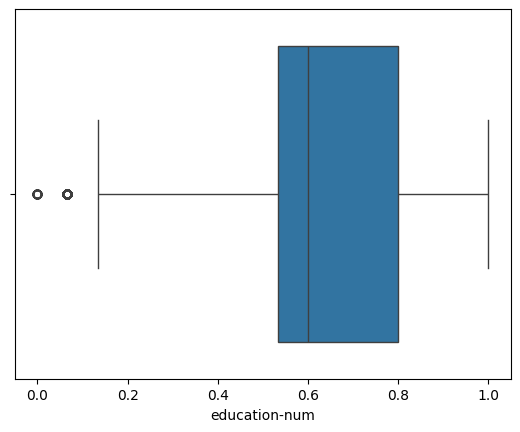

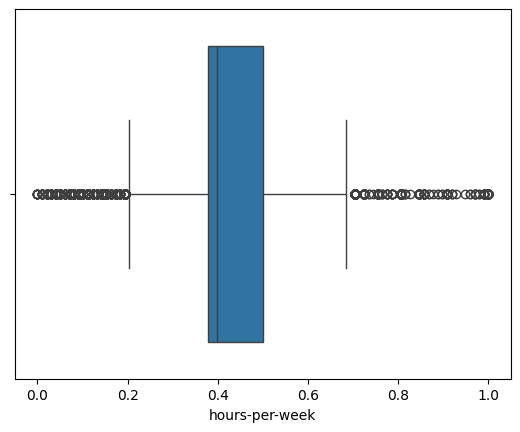

In [17]:
# BOX PLOT FOR OUTLIERS
for i in data.select_dtypes(include="number").columns:
    sns.boxplot(data=data, x  = i)
    plt.show()

In [ ]:
for i in ["age"]:
    sns.pairplot(data=data)
    plt.show()

In [ ]:
# pair plot for comparison
for i in data.select_dtypes(include="number").columns:
    sns.pairplot(data=data, hue=i, y_vars="salary")
    plt.show()


In [ ]:
# Bar Plot
# for i in ["native-country"]:
#     plt.figure(figsize=(42,12))
#     sns.barplot(data=data, x = i, y="occupation")
#     plt.show()

<h4> Scaling the Data

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data.iloc[:,0:3] = scaler.fit_transform(data.iloc[:,0:3])


In [18]:
data.head()

,age,education-num,hours-per-week,workclass,occupation,sex,salary
0,0.301370,0.800000,0.397959,State-gov,Adm-clerical,Male,<=50K
1,0.452055,0.800000,0.122449,Self-emp-not-inc,Exec-managerial,Male,<=50K
2,0.287671,0.533333,0.397959,Private,Handlers-cleaners,Male,<=50K
3,0.493151,0.400000,0.397959,Private,Handlers-cleaners,Male,<=50K
4,0.150685,0.800000,0.397959,Private,Prof-specialty,Female,<=50K


<h3> Encoding the 'workclass', 'occupation', 'sex' and 'salary' columns


<h4> Applying label encoding on sex and salary columns

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ["sex", "salary"]:
    data[i] = le.fit_transform(data[i])

<h4> Applying one hot encoding on workclass and occupation

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [3])], remainder = "passthrough")
data = pd.DataFrame(ct.fit_transform(data))

In [23]:
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [10])], remainder = "passthrough")
data = pd.DataFrame(ct.fit_transform(data))

# Outlier Treatment

In [ ]:
def wisker(col):
    q1,q3 = np.percentile(col, [25,75])
    iqr = q3 - q1
    lw = q1 - (1.5 * iqr)
    uw = q3 + (1.5 * iqr)
    return lw, uw

In [ ]:
for i in ['age', 'hours-per-week', 'education-num']:
    lw,uw = wisker(data[i])
    data[i] = np.where(data[i] < lw, lw, data[i])
    data[i] = np.where(data[i] > uw, uw, data[i])
    

# Saving the cleaned dataset to a new file

In [ ]:
data.to_csv("cleaned_dataset.csv")